In [0]:
import tensorflow as tf

from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



$$ x(t) = \sin(\omega t^2) $$

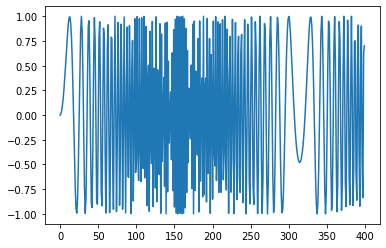

In [3]:

series = np.sin((0.1*np.arange(400))**2)

plt.plot(series)
plt.show()

In [4]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) 
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)


X.shape (390, 10) Y.shape (390,)


In [5]:
#autoregresivo lineal

i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.01),
)

r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
7/7 [==============================] - 0s 27ms/step - loss: 1.0887 - val_loss: 1.1618
Epoch 2/80
7/7 [==============================] - 0s 9ms/step - loss: 0.9266 - val_loss: 1.0159
Epoch 3/80
7/7 [==============================] - 0s 8ms/step - loss: 0.8094 - val_loss: 0.9018
Epoch 4/80
7/7 [==============================] - 0s 8ms/step - loss: 0.7225 - val_loss: 0.8139
Epoch 5/80
7/7 [==============================] - 0s 10ms/step - loss: 0.6547 - val_loss: 0.7447
Epoch 6/80
7/7 [==============================] - 0s 9ms/step - loss: 0.6071 - val_loss: 0.6870
Epoch 7/80
7/7 [==============================] - 0s 8ms/step - loss: 0.5667 - val_loss: 0.6410
Epoch 8/80
7/7 [==============================] - 0s 8ms/step - loss: 0.5423 - val_loss: 0.6082
Epoch 9/80
7/7 [==============================] - 0s 9ms/step - loss: 0.5269 - val_loss: 0.5940
Epoch 10/80
7/7 [==============================] - 0s 9ms/step - loss: 0.5170 - val_loss: 0.5943
Epoch 11/80
7/7 [====================

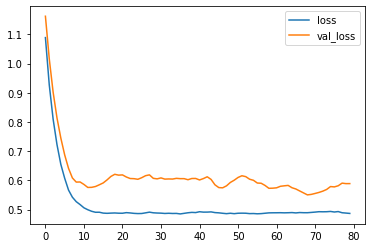

In [6]:

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(390, 1)


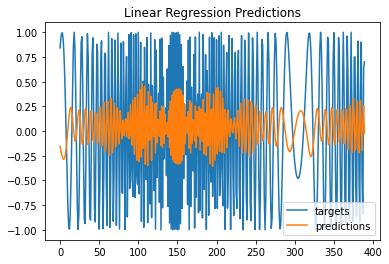

In [7]:
#todo
#es un asco
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

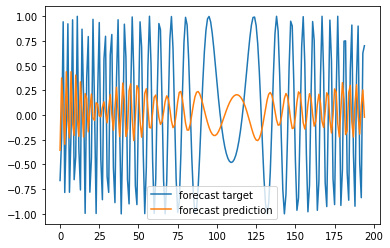

In [12]:
#solo validation

validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] 
  i += 1
  
  validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

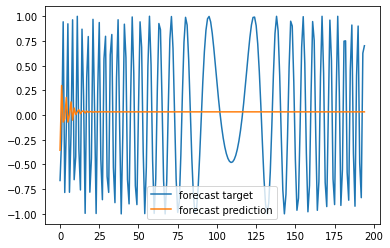

In [13]:
#multistep
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2] 

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] 
  
  validation_predictions.append(p)
  
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [14]:
#lstm
X = X.reshape(-1, T, 1) # make it N x T x D

i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.05),
)

r = model.fit(
  X[:-N//2], Y[:-N//2],
  batch_size=32,
  epochs=200,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
7/7 [==============================] - 0s 65ms/step - loss: 0.5792 - val_loss: 0.5023
Epoch 2/200
7/7 [==============================] - 0s 11ms/step - loss: 0.5161 - val_loss: 0.5295
Epoch 3/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4894 - val_loss: 0.5646
Epoch 4/200
7/7 [==============================] - 0s 30ms/step - loss: 0.4397 - val_loss: 0.5138
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3162 - val_loss: 0.3971
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 0.2679 - val_loss: 0.4076
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1859 - val_loss: 0.3103
Epoch 8/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1124 - val_loss: 0.2834
Epoch 9/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0731 - val_loss: 0.2702
Epoch 10/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0459 - val_loss: 0.2814
Epoch 11/200
7/7 [=

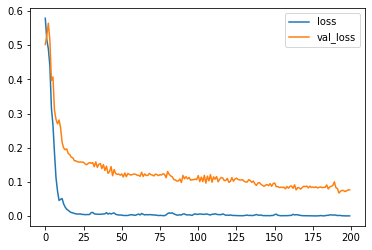

In [15]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

(390, 1)


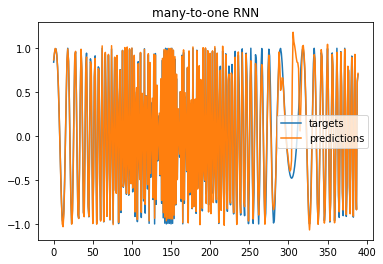

In [16]:
# 1 step forecast
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

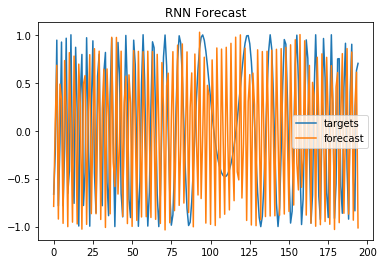

In [0]:
# multistep
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):

  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)


  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()